In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

In [69]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)


In [70]:
np.random.seed(2304)

In [71]:
#pd.set_option('display.max_rows', 500)

In [72]:
liver = pd.read_csv(r'indian_liver_patient.csv' )
liver

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [73]:
liver.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

We can ether call the desired coloumn by name or position:

In [74]:
ill_1 = liver.ix[:, ['Dataset']]
ill_2 = liver.ix[:, -1]
print(ill_1.shape)
print(ill_2.shape)

(583, 1)
(583,)


In [8]:
#pd.plotting.scatter_matrix(liver, c=ill_2, figsize=(15,15), marker='o', s=30),
#plt.show()

In big data sets it can be hard to spot missing values. In this case the scatter matrix results in an error since some values are missing (resulting in different lenghts in the data sets). 

Since it only a few rows have missing values we can choose to simple drop these rows:

In [75]:
liver=liver.dropna()
ill = liver.ix[:, -1]

(579,)

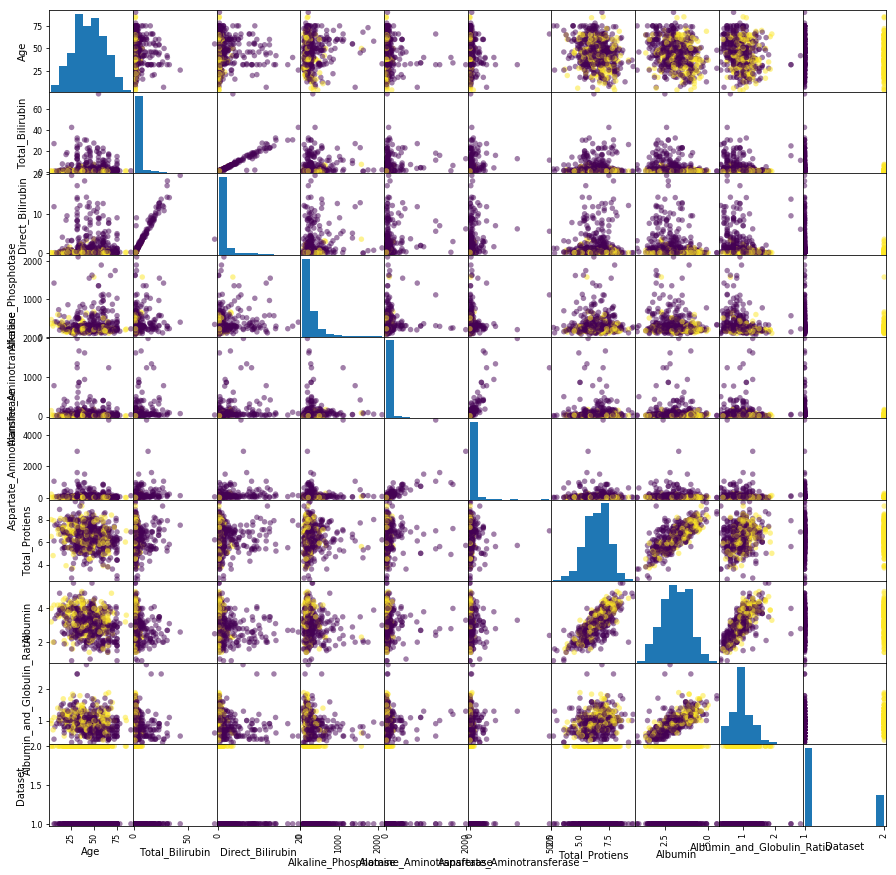

In [10]:
pd.plotting.scatter_matrix(liver, c=ill, figsize=(15,15), marker='o', s=30),
plt.show()

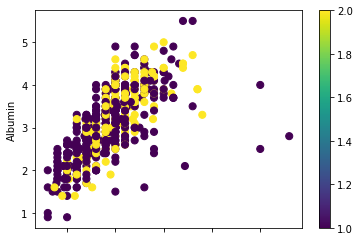

In [11]:
liver.plot.scatter(x='Albumin_and_Globulin_Ratio', y='Albumin', c=ill, colormap='viridis', s=50);

In [12]:
X = liver.ix[:, 9:10]
y = liver.ix[:, 8:9]
y

,Albumin
0,3.3
1,3.2
2,3.3
3,3.4
4,2.4
5,4.4
6,3.5
7,3.6
8,4.1
9,3.4


In [13]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
y_proba = reg.predict(X)

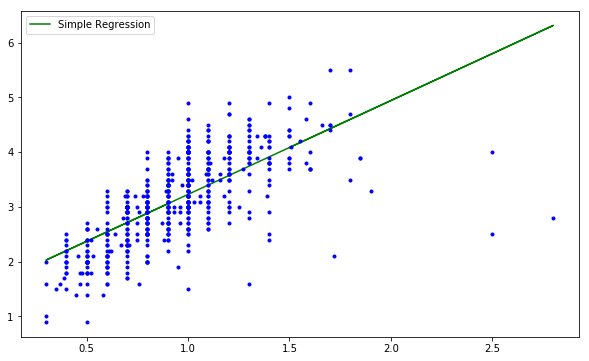

In [15]:
f = plt.figure(figsize=(10, 6))
plt.plot(X, y_proba[:, 0], "g-", label="Simple Regression")
plt.plot(X, y, 'bo', markersize=3)
plt.legend(loc='best');

In [16]:
k = reg.coef_[0]
d = reg.intercept_
print(' y = {0} * x + {1}'.format(k, d))

 y = [1.71427221] * x + [1.51498935]


In [17]:
sample=reg.predict(5)
sample

array([[10.08635042]])

How good is our regression?

In [18]:
reg.score(X, y) #r^2

0.4755927669898311

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_proba) #mse

0.3303956878109891

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.15)

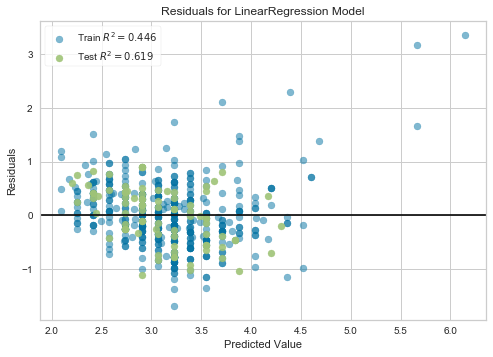

In [21]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(reg, hist=False)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
g = visualizer.poof() 

Outliers?


In [22]:
#from sklearn.ensemble import IsolationForest
#clf = IsolationForest(max_samples=100, random_state=2304, contamination=0.1) #How many outlier do we want to detect?
#clf.fit(X_train);

In [23]:
from sklearn.covariance import EllipticEnvelope
clf = EllipticEnvelope(contamination=0.025)
clf.fit(X_train)

EllipticEnvelope(assume_centered=False, contamination=0.025,
         random_state=None, store_precision=True, support_fraction=None)

In [24]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0]) #correct/all

Accuracy: 1.0


In [25]:
X_inlier=X_train[clf.predict(X_train)==1]
y_inlier=y_train[clf.predict(X_train)==1]
X_outlier=X_train[clf.predict(X_train)==-1]
y_outlier=y_train[clf.predict(X_train)==-1]
print(X_inlier.shape)
print(X_outlier.shape)

(482, 1)
(10, 1)


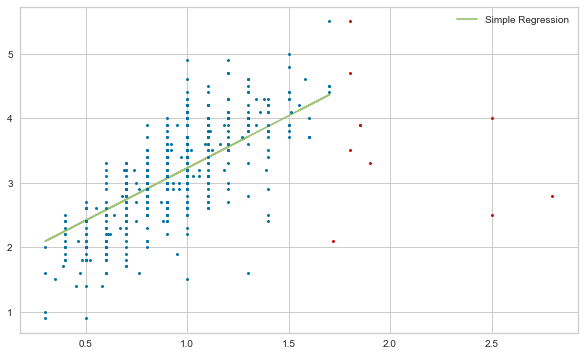

In [26]:
y_proba_inlier = reg.predict(X_inlier)

f = plt.figure(figsize=(10, 6))
plt.plot(X_inlier, y_proba_inlier[:, 0], "g-", label="Simple Regression")
plt.plot(X_inlier, y_inlier, 'bo', markersize=3)
plt.plot(X_outlier, y_outlier, 'ro', markersize=3)
plt.legend(loc='best');

Improvement?

In [27]:
print(reg.score(X_train, y_train))
reg.score(X_inlier, y_inlier) #

0.4459249228706352


0.540070225740025

In [28]:
y_proba_train = reg.predict(X_train)
print(mean_squared_error(y_train, y_proba_train))
mean_squared_error(y_inlier, y_proba_inlier)

0.3448890061294125


0.2811533858919882

We managed to decrease the mse and increase r^2

### two variables

In [29]:
heart = pd.read_csv(r'echocardiogram.csv' )
heart

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.00,0.0,71.000,0.0,0.260,9.000,4.600,14.00,1.000,1.000,name,1,0.0
1,19.00,0.0,72.000,0.0,0.380,6.000,4.100,14.00,1.700,0.588,name,1,0.0
2,16.00,0.0,55.000,0.0,0.260,4.000,3.420,14.00,1.000,1.000,name,1,0.0
3,57.00,0.0,60.000,0.0,0.253,12.062,4.603,16.00,1.450,0.788,name,1,0.0
4,19.00,1.0,57.000,0.0,0.160,22.000,5.750,18.00,2.250,0.571,name,1,0.0
5,26.00,0.0,68.000,0.0,0.260,5.000,4.310,12.00,1.000,0.857,name,1,0.0
6,13.00,0.0,62.000,0.0,0.230,31.000,5.430,22.50,1.875,0.857,name,1,0.0
7,50.00,0.0,60.000,0.0,0.330,8.000,5.250,14.00,1.000,1.000,name,1,0.0
8,19.00,0.0,46.000,0.0,0.340,0.000,5.090,16.00,1.140,1.003,name,1,0.0
9,25.00,0.0,54.000,0.0,0.140,13.000,4.490,15.50,1.190,0.930,name,1,0.0


In [30]:
heart=heart.dropna(subset=heart.columns[0:7], how='any')

In [31]:
heart.shape

(108, 13)

We can choose to predict a binary variable which will in essence be a classification task (e.g. alive). Or we can choose a continous variable (e.g. lvdd)

In [32]:
alive = heart.iloc[:, 1]
lvdd = heart.iloc[:, 6]

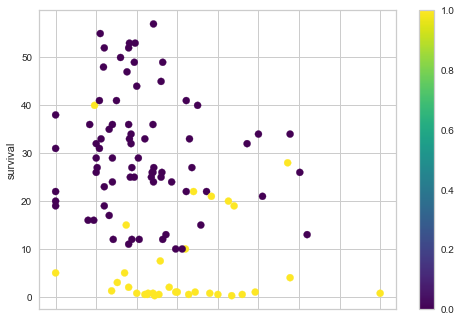

In [33]:
heart.plot.scatter(x='epss', y='survival', c=alive, colormap='viridis', s=50);

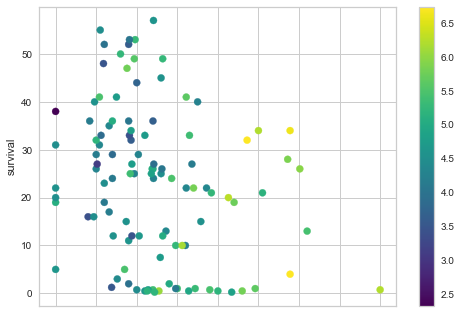

In [34]:
heart.plot.scatter(x='epss', y='survival', c=lvdd, colormap='viridis', s=50);

In [35]:
X2 = heart.ix[:, ['epss', 'survival']]
y2_bin = alive
y2_cont = lvdd

In [36]:
X2 = X2.values

In [37]:
X2_train, X2_test, y2_bin_train, y2_bin_test, y2_cont_train, y2_cont_test = train_test_split(X2, y2_bin, y2_cont, random_state=2304, test_size=0.15)

In [38]:
def plot_decision_regions(X, y, classifier):
    """
    Modified from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch03/ch03.ipynb
    """
    from matplotlib.colors import ListedColormap
    
    f = plt.figure()

    # Find the lower and upper values for the petal length and petal width
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Generate a bunch of measurements in-between the min and max values
    x0, x1 = np.meshgrid(
        np.linspace(x0_min, x0_max, 500).reshape(-1, 1),
        np.linspace(x1_min, x1_max, 200).reshape(-1, 1),
    )
    
    X_new = np.array([x0.ravel(), x1.ravel()]).T
    
    # Predict with the classifier on the new data
    Z = classifier.predict(X_new)
    
    # Reshape and plot as a contour plot:
    Z = Z.reshape(x0.shape)
    plt.contourf(x0, x1, Z, alpha=0.4, cmap=plt.cm.YlOrRd)
    
    # Add the training instances to the plot
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[:,0], 
                    y=X[:,1],
                    alpha=0.6, 
                    edgecolor='black',
                    c=y,
                    cmap='winter',
                    marker='x',
                    label=cl)



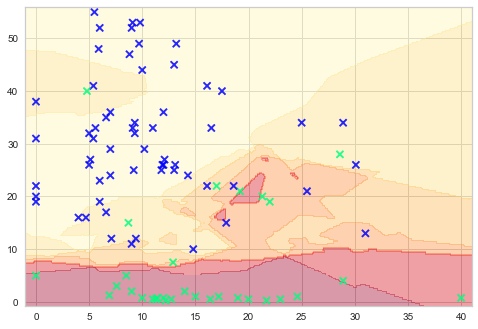

In [39]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg_bin = KNeighborsRegressor()
knn_reg_bin.fit(X2_train, y2_bin_train)
plot_decision_regions(X2_train, y2_bin_train, knn_reg_bin)

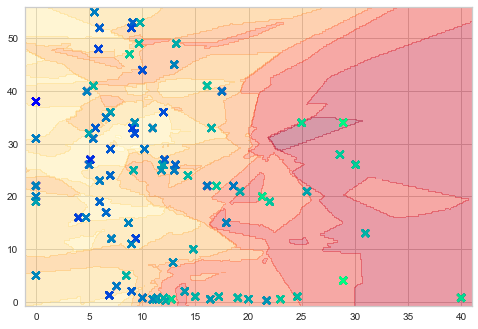

In [40]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg_cont = KNeighborsRegressor()
knn_reg_cont.fit(X2_train, y2_cont_train)
plot_decision_regions(X2_train, y2_cont_train, knn_reg_cont)

We can choose this opportunity to visualize how the different regression models work:

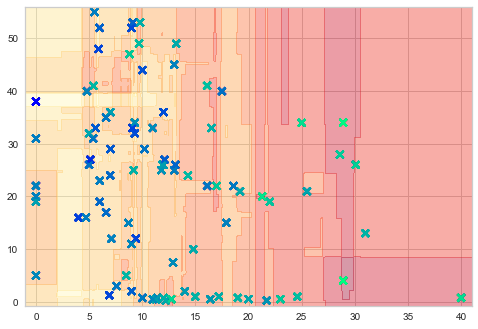

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X2_train, y2_cont_train)
plot_decision_regions(X2_train, y2_cont_train, rf_reg)

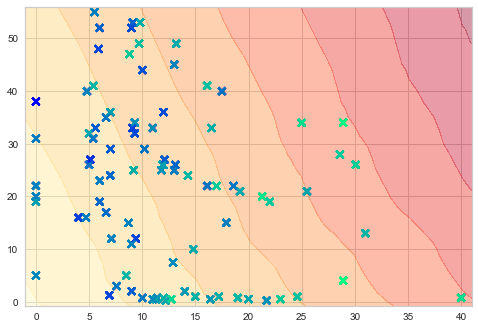

In [42]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor()
mlp_reg.fit(X2_train, y2_cont_train)
plot_decision_regions(X2_train, y2_cont_train, mlp_reg)

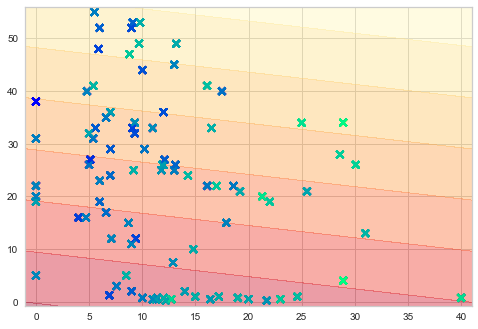

In [43]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()
sgd_reg.fit(X2_train, y2_cont_train)
plot_decision_regions(X2_train, y2_cont_train, sgd_reg)

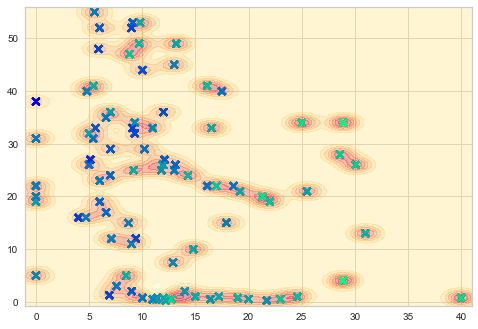

In [44]:
from sklearn.gaussian_process import GaussianProcessRegressor
gau_reg = GaussianProcessRegressor()
gau_reg.fit(X2_train, y2_cont_train)
plot_decision_regions(X2_train, y2_cont_train, gau_reg)

In [45]:
#y2_knn = knn_reg.predict(X2_train)
#print(mean_squared_error(y2_cont_train, y2_knn))
#y2_rf = rf_reg.predict(X2_train)
#print(mean_squared_error(y2_cont_train, y2_rf))
#y2_mlp = mlp_reg.predict(X2_train)
#print(mean_squared_error(y2_cont_train, y2_mlp))
#y2_sgd = sgd_reg.predict(X2_train)
#print(mean_squared_error(y2_cont_train, y2_sgd))


### Multivariant Regression:

In [46]:
happy = pd.read_csv(r'2016.csv' )
happy

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [47]:
a = happy.ix[:, ['Generosity', 'Health (Life Expectancy)' , 'Economy (GDP per Capita)', 'Family', 'Freedom', 'Trust (Government Corruption)', 'Dystopia Residual']]
b = happy.ix[:, ['Happiness Score']]

In [48]:
X3_train, X3_test, y3_train, y3_test = train_test_split(a, b, random_state=2304)

We can try a few differnt Regressors again:

In [49]:
regr2 = RandomForestRegressor(random_state=42)
regr2.fit(X3_train, y3_train)
#importances=regr.feature_importances_
#print(importances)
regr2.score(X3_test, y3_test)

0.9150972227290047

In [50]:
knn2_reg = KNeighborsRegressor()
knn2_reg.fit(X3_train, y3_train)
knn2_reg.score(X3_test, y3_test) 

0.944199280216381

In [62]:
gau2_reg = GaussianProcessRegressor()
gau2_reg.fit(X3_train, y3_train)
gau2_reg.score(X3_test, y3_test) #why so good? 


0.9984871444330947

In [52]:
y3_gau = gau2_reg.predict(X3_train)
print(mean_squared_error(y3_train, y3_gau))


2.1242040639134668e-16


In [53]:
mlp2_reg = MLPRegressor()
mlp2_reg.fit(X3_train, y3_train)
mlp2_reg.score(X3_test, y3_test) 

0.9187100987288745

Optimize:

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]
algorithm = ['ball_tree', 'kd_tree', 'brute', 'auto']
weights = ['uniform', 'distance']

random_grid = {'n_neighbors': n_neighbors, 'algorithm': algorithm, 'weights': weights}

print(random_grid)

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20], 'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'], 'weights': ['uniform', 'distance']}


In [57]:
grid = GridSearchCV(estimator=knn2_reg, param_grid=random_grid, scoring='neg_mean_squared_error')
grid.fit(X3_train, y3_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20], 'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [58]:
grid.best_estimator_

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='distance')

In [59]:
knn3_reg = KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='distance')
knn3_reg.fit(X3_train, y3_train)
knn3_reg.score(X3_test, y3_test)

0.9486688568998122